## Imports

In [1]:
#Imports
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

## New list with all Excel files

In [2]:
# Der Pfad zur Excel-Datei, die alle vorbereiteten Daten für die Modellierung enthält
file_path = r'C:\Users\nmilo\OneDrive\Desktop\Studium\Bachelorarbeit\pfr.combine\new_data_final_cleaned.xlsx'

# Einmaliges Einlesen der Excel-Datei
df = pd.read_excel(file_path)

# Deskriptive Statistiken ausgeben
print(df.columns)


Index(['Player', 'Pos', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump',
       '3Cone', 'Shuttle', 'Drafted', 'NFL Games', 'NFL Snaps',
       'Personal Accolades', 'Drafted_Binary', 'Height_in_inches'],
      dtype='object')


## Group Data by Position

In [3]:
# Spalten droppen, die nicht benötigt werden
df = df.drop(columns=['Player', 'Drafted', 'Ht'])

# Gruppieren des DataFrames nach der 'Pos' Spalte (ersetzen Sie 'Pos' durch den tatsächlichen Spaltennamen)
grouped_by_position = df.groupby('Pos')  # Annahme, dass 'Pos' der korrekte Spaltenname ist

# Berechnen der durchschnittlichen Werte für jede Position
avg_stats_by_position = grouped_by_position.mean()

print("Durchschnittliche Statistiken nach Position:")
print(avg_stats_by_position)

Durchschnittliche Statistiken nach Position:
              Wt      40yd   Vertical      Bench  Broad Jump     3Cone  \
Pos                                                                      
C     304.363636  5.227551  28.020036  24.575758  104.561869  7.655541   
CB    192.809524  4.485903  35.939864  14.274357  124.088743  6.942504   
DB    196.898223  4.537963  35.902674  15.146695  123.700257  7.048810   
DE    268.243478  4.820000  32.670630  23.244186  116.510417  7.268816   
DL    289.538462  4.976346  30.794792  25.968750  111.760870  7.569067   
DT    306.547619  5.109631  28.871345  25.648148  106.390982  7.679592   
EDGE  252.812500  4.670088  33.860783  22.741120  119.572072  7.145056   
FB    240.000000  4.805636  33.515152  23.030303  115.363636  7.238182   
ILB   238.520000  4.753750  32.171053  20.219512  116.675676  7.082500   
LB    235.478214  4.648056  34.450548  20.517388  120.357100  7.130206   
LS    236.000000  5.105714  29.035714  14.571429  108.600000  7.470

## Position Based analysis

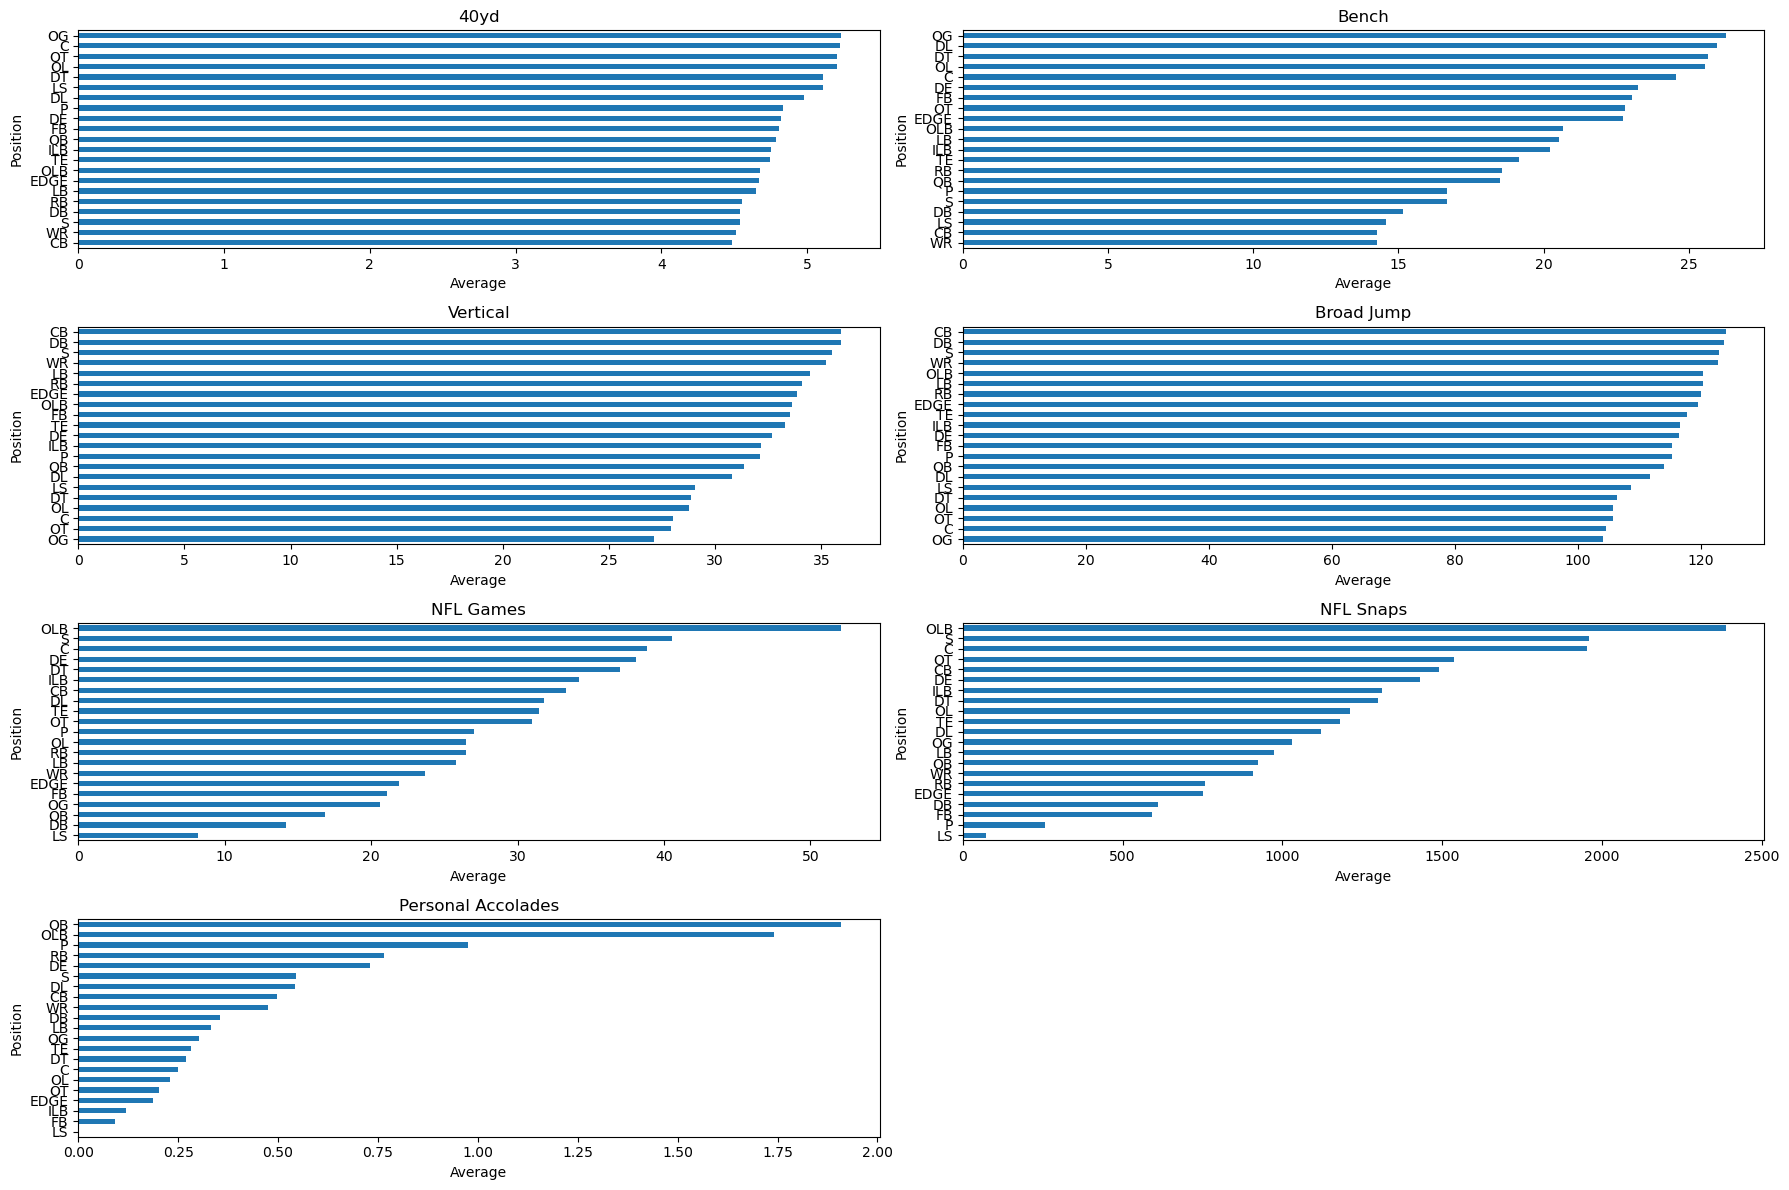

In [4]:
# Gruppieren des DataFrames nach der 'Pos' Spalte und Berechnung des Durchschnitts
avg_by_position = df.groupby('Pos').mean()

# Liste der Combine-Übungen, Leistungsstatistiken und der Höhe in Zoll zur Analyse
combine_exercises = ['40yd', 'Bench', 'Vertical', 'Broad Jump', 'NFL Games', 'NFL Snaps', 'Personal Accolades']

# Visualisierung der durchschnittlichen Leistung in den Combine-Übungen und der Höhe in Zoll für jede Position
plt.figure(figsize=(18, 12))
for i, exercise in enumerate(combine_exercises, 1):
    plt.subplot(4, 2, i)  # Anpassung für 7 Plots statt 6
    if exercise in avg_by_position.columns:  # Überprüfen, ob die Spalte existiert
        avg_by_position[exercise].sort_values().plot(kind='barh', title=exercise)
        plt.xlabel('Average')
        plt.ylabel('Position')

plt.tight_layout()
plt.show()


## Correlation analysis

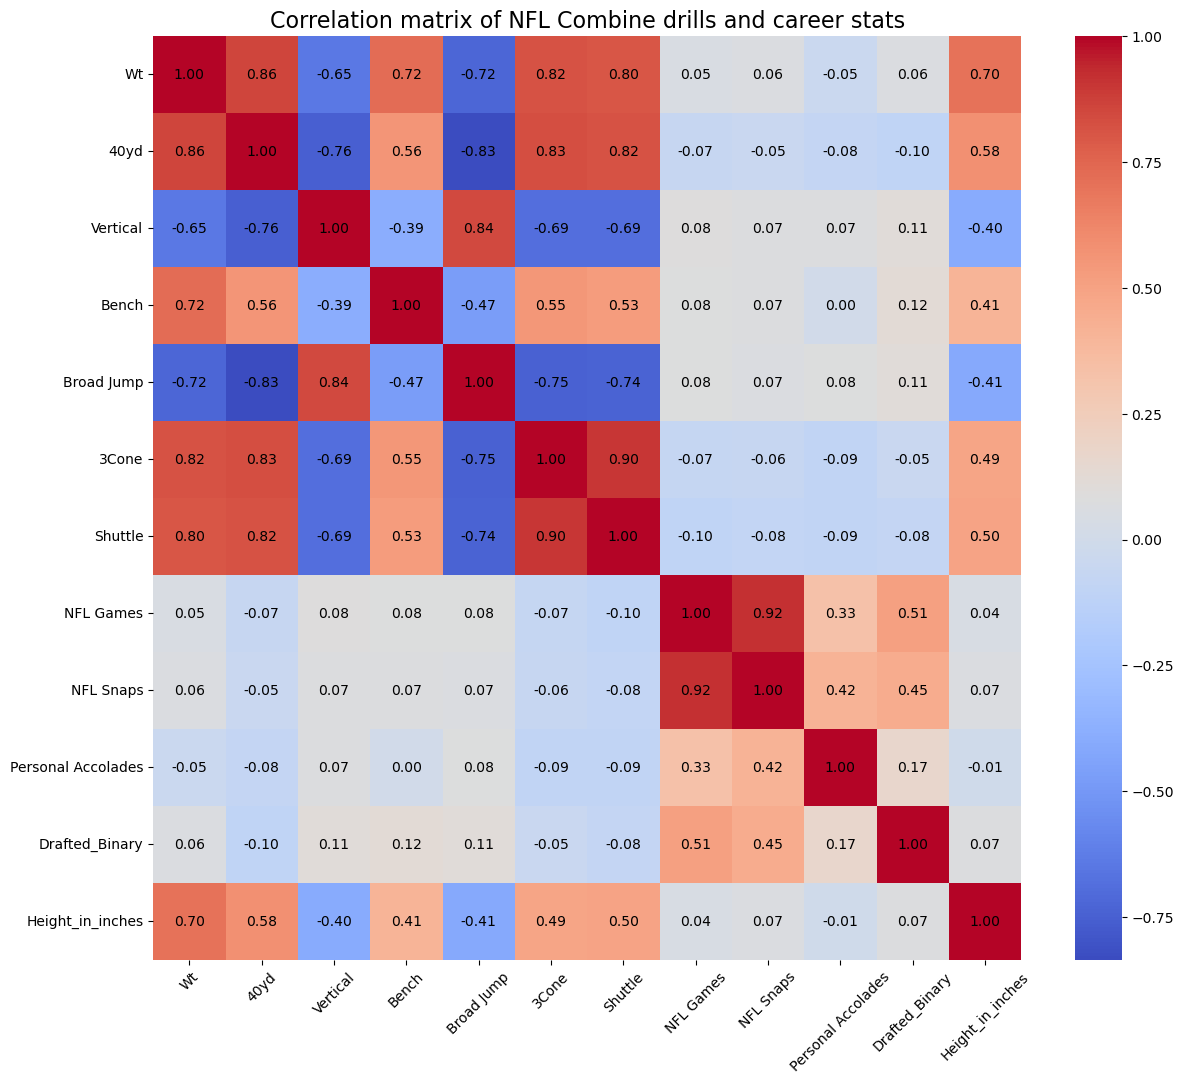

In [5]:
# Spalte 'Pos' droppen, da sie nicht numerisch ist
df = df.drop(columns=['Pos'])

# Berechnen der Korrelationsmatrix
corr_matrix = df.corr()

# Visualisierung der Korrelationsmatrix mit einer Heatmap
plt.figure(figsize=(14, 12))  # Vergrößerte Figurgröße
heatmap = sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Annotationen manuell hinzufügen
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation matrix of NFL Combine drills and career stats', fontsize=16)
plt.xticks(rotation=45)  # Optional: Drehung der x-Achsen-Beschriftungen
plt.yticks(rotation=0)   # Optional: Drehung der y-Achsen-Beschriftungen
plt.show()

In [6]:
import pandas as pd
from scipy.stats import pearsonr

# Eine Liste von Paaren von Variablen, die Sie untersuchen möchten
variable_pairs = [
    ('Wt', 'NFL Games'),
    ('Wt', 'NFL Snaps'),
    ('Wt', 'Personal Accolades'),
    ('40yd', 'NFL Games'),
    ('40yd', 'NFL Snaps'),
    ('40yd', 'Personal Accolades'),
    ('Vertical', 'NFL Games'),
    ('Vertical', 'NFL Snaps'),
    ('Vertical', 'Personal Accolades'),
    ('Drafted_Binary', 'NFL Games'),
    ('Drafted_Binary', 'NFL Snaps'),
    ('Drafted_Binary', 'Personal Accolades')
]

# Signifikanzniveau
alpha = 0.01

# Durchführung der Korrelationsanalyse für jedes Paar
for var1, var2 in variable_pairs:
    # Überprüfung, ob beide Spalten vorhanden sind
    if var1 in df.columns and var2 in df.columns:
        correlation, p_value = pearsonr(df[var1].dropna(), df[var2].dropna())
        print(f"Correlation between {var1} and {var2}: {correlation:.3f}")
        print(f"P-value: {p_value:.3f}")
        
        # Interpretation der Signifikanz
        if p_value < alpha:
            print(f"The correlation between {var1} and {var2} is statistically significant at the {alpha} level.")
        else:
            print(f"The correlation between {var1} and {var2} is not statistically significant at the {alpha} level.")
        print("\n")  # Für bessere Lesbarkeit
    else:
        print(f"One or both variables '{var1}' or '{var2}' are missing in the DataFrame.\n")


Correlation between Wt and NFL Games: 0.054
P-value: 0.005
The correlation between Wt and NFL Games is statistically significant at the 0.01 level.


Correlation between Wt and NFL Snaps: 0.062
P-value: 0.001
The correlation between Wt and NFL Snaps is statistically significant at the 0.01 level.


Correlation between Wt and Personal Accolades: -0.046
P-value: 0.016
The correlation between Wt and Personal Accolades is not statistically significant at the 0.01 level.


Correlation between 40yd and NFL Games: -0.067
P-value: 0.001
The correlation between 40yd and NFL Games is statistically significant at the 0.01 level.


Correlation between 40yd and NFL Snaps: -0.048
P-value: 0.013
The correlation between 40yd and NFL Snaps is not statistically significant at the 0.01 level.


Correlation between 40yd and Personal Accolades: -0.080
P-value: 0.000
The correlation between 40yd and Personal Accolades is statistically significant at the 0.01 level.


Correlation between Vertical and NFL Gam

## Cluster analysis

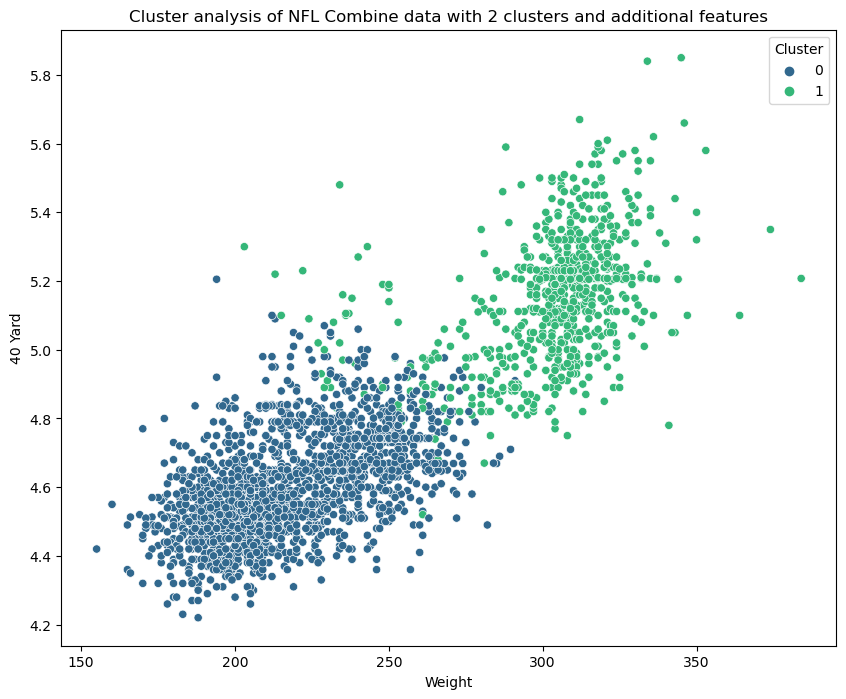

Cluster distribution:
Cluster
0    1952
1     742
Name: count, dtype: int64


In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt




# Daten skalieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# K-Means Clustering mit 2 Clustern
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Cluster zu DataFrame hinzufügen
df['Cluster'] = clusters

# Visualisierung
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Wt'], y=df['40yd'], hue=df['Cluster'], palette='viridis')
plt.title('Cluster analysis of NFL Combine data with 2 clusters and additional features')
plt.xlabel('Weight')
plt.ylabel('40 Yard')
plt.legend(title='Cluster')
plt.show()

# Cluster-Verteilung anzeigen
cluster_counts = df['Cluster'].value_counts()
print("Cluster distribution:")
print(cluster_counts)


## Histogramm

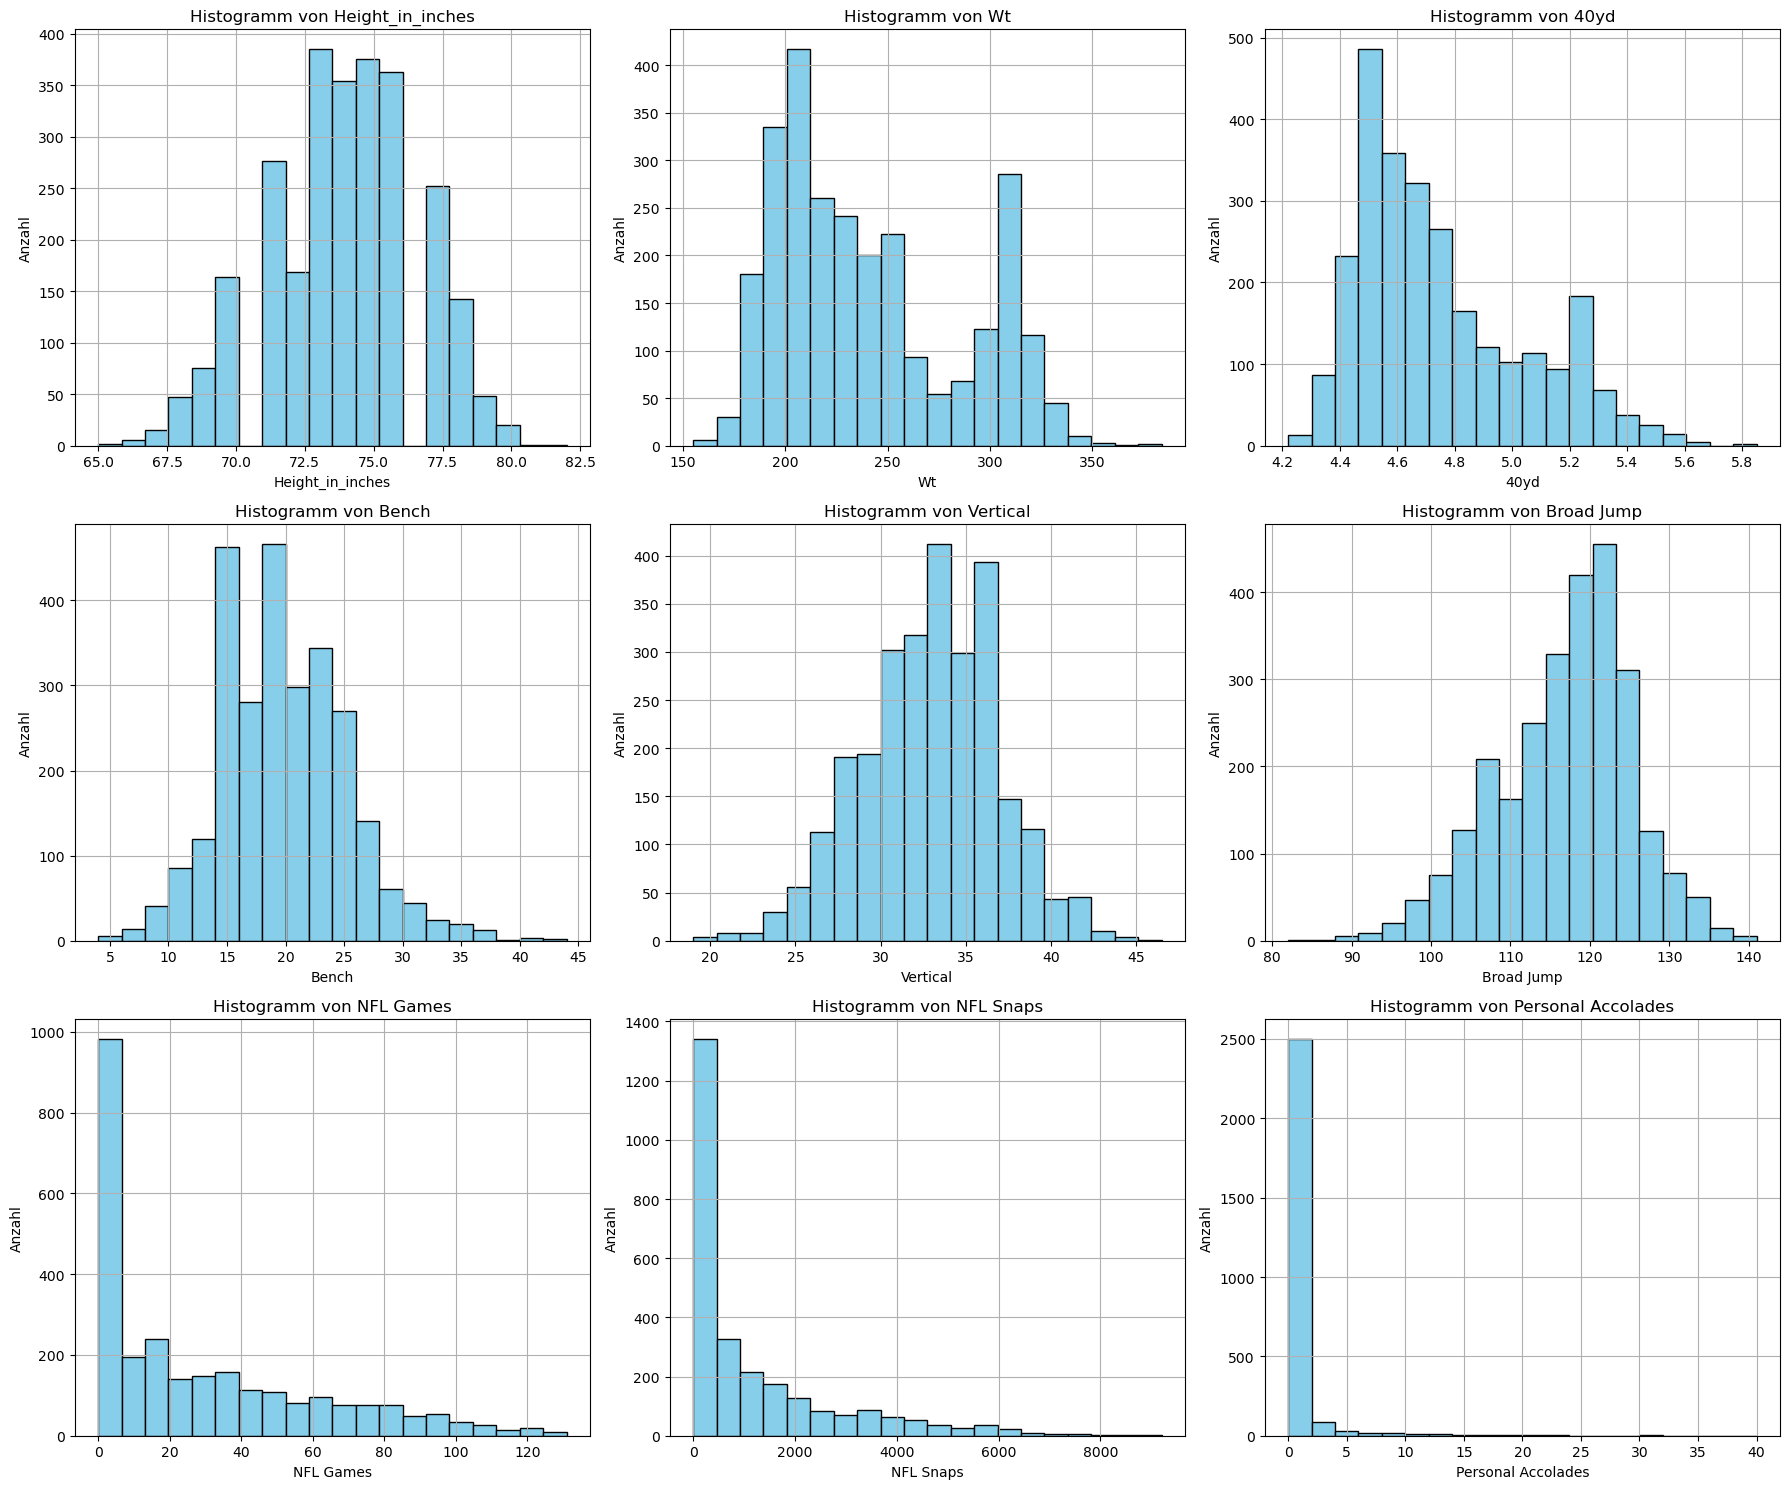

In [8]:
# Die Excel-Datei einlesen
combined_df = pd.read_excel(file_path)

# Variablen für die Verteilungsanalyse auswählen
selected_variables = ['Height_in_inches', 'Wt', '40yd', 'Bench', 'Vertical', 'Broad Jump', 'NFL Games', 'NFL Snaps', 'Personal Accolades']

# Überprüfen, ob alle Variablen im DataFrame vorhanden sind
missing_vars = [var for var in selected_variables if var not in combined_df.columns]
if missing_vars:
    raise ValueError(f"Die folgenden Variablen fehlen im DataFrame: {missing_vars}")

# Histogramme für die ausgewählten Variablen erstellen
plt.figure(figsize=(18, 15))  # Vergrößerung des Figure-Layouts
rows = (len(selected_variables) + 1) // 3  # Berechnung der benötigten Zeilenanzahl für Subplots
for i, var in enumerate(selected_variables, 1):
    plt.subplot(rows, 3, i)  # Anpassung an die Anzahl der Variablen
    combined_df[var].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogramm von {var}')
    plt.xlabel(var)
    plt.ylabel('Anzahl')

plt.tight_layout()
plt.show()


## Feature Engineering

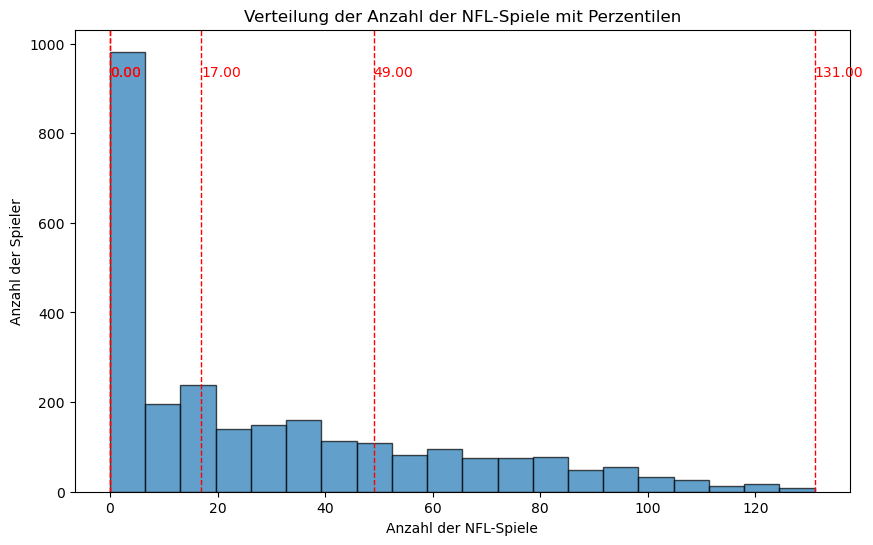

0th Percentile: 0.0
25th Percentile: 0.0
50th Percentile: 17.0
75th Percentile: 49.0
100th Percentile: 131.0


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Berechnung der Perzentile für die Anzahl der NFL-Spiele
file_path = r'C:\Users\nmilo\OneDrive\Desktop\Studium\Bachelorarbeit\pfr.combine\new_data_final_cleaned.xlsx'

# Einmaliges Einlesen der Excel-Datei
df = pd.read_excel(file_path)
# Berechnung der Perzentile für die Anzahl der NFL-Spiele
percentiles = np.percentile(df['NFL Games'], [0, 25, 50, 75, 100])

# Histogramm erstellen
plt.figure(figsize=(10, 6))
plt.hist(df['NFL Games'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Anzahl der NFL-Spiele')
plt.ylabel('Anzahl der Spieler')
plt.title('Verteilung der Anzahl der NFL-Spiele mit Perzentilen')

# Perzentile auf dem Histogramm markieren
for perc in percentiles:
    plt.axvline(perc, color='r', linestyle='dashed', linewidth=1)
    plt.text(perc, plt.ylim()[1] * 0.9, f'{perc:.2f}', color='r')

plt.show()

# Ausgabe der Perzentile
percentiles_dict = {'0th Percentile': percentiles[0],
                    '25th Percentile': percentiles[1],
                    '50th Percentile': percentiles[2],
                    '75th Percentile': percentiles[3],
                    '100th Percentile': percentiles[4]}

for key, value in percentiles_dict.items():
    print(f'{key}: {value}')

